In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d sachinpatel21/pothole-image-dataset
!unzip /content/pothole-image-dataset.zip

 89% 128M/144M [00:03<00:00, 32.2MB/s]
100% 144M/144M [00:03<00:00, 47.7MB/s]
Archive:  /content/pothole-image-dataset.zip
  inflating: pothole_image_data/Pothole_Image_Data/1.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/10.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/100.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/101.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/102.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/103.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/104.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/105.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/106.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/107.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/108.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/109.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/11.jpg  
  inflating: pothole_image_data/Pothole_Image_Data/110.jpg  
  inflating: pothole_image_

In [0]:
import os
os.chdir('/content/pothole_image_data/Pothole_Image_Data')

In [0]:
from google.colab import files
files.upload()

Saving xml_files.zip to xml_files.zip


{'xml_files.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x002CRPj_\x16f\x03\x01\x00\x00\x03\x02\x00\x00\x05\x00\x00\x001.xmlMQKn\x840\x0c]\xd3S\xf4\x04\r\xd0V\xaa*+w\xe8\xa2;6\x81\x18\xc8\x14\x12\x04A\xc3\xf4\xf4\xb5M\x80\xee\x9e\xdfOv\x02\xc6\xfb\x10Mt\xc1\xeb\xa7\x0c\xda0X\x9c\xf5\x8c\x8b\xfbE\x0b*\xcd\xac\xb8\x01\xbd\x19Q\x17/\xb7\xa9#\xe5\x98I\x9bL\xec\xf5\xd7g5\x85\xd8\x87\x01\x9f-Fl\xb8\xb2JEU\n\x89\x91\x02KX\xe7\x86\xa3\x19X\x13Mm\x16\xd4\xdf\xfe\xc7\x87\xbb\x07u2dT\xa7\x13\xb8H\x12wg\xa9\xa5\xccsP;d\xb2G\xd7\xf5qg\x13\x96v\x9c\xc8\xf0J\xa5\x02\xa4q\xef\x81\x05\xbb\x11}D\xab)r\r\xa4\x84\xfaF\xebK^.Lg\x81J\xf7\xd2\xc1A\x16^&l\\\xeb\xf8\xa1\x84a)\xce\xaboL\xaa\xbd\x06Y\xc6\xb5\xadk\xd6!\xb2t\r,\xd5\xde\xd6ac\x98\xc16:\xaf?\xc8"@\xa8\x07\xa3"\x7f\x07\xf58\xb9m4\x9b.\xdeJ\xf6\x99\xed\xf01W\x8ao\xe7@\x9d\xd5\xa0\x8e\xc3@\xfd\xff\xf5?PK\x03\x04\x14\x00\x00\x00\x08\x00ACRP\xf4\x1a\xb0\x81\x1b\x01\x00\x00\xe3\x02\x00\x00\x06\x00\x00\x0010.xml\xcdR;n\x840\x10\xad7\xa7\xc8\tbv\x17\x11\x12\x8d|\

In [0]:
!unzip xml_files.zip

Archive:  xml_files.zip
  inflating: 1.xml                   
  inflating: 10.xml                  
  inflating: 100.xml                 
  inflating: 101.xml                 
  inflating: 102.xml                 
  inflating: 103.xml                 
  inflating: 104.xml                 
  inflating: 105.xml                 
  inflating: 106.xml                 
  inflating: 107.xml                 
  inflating: 108.xml                 
  inflating: 109.xml                 
  inflating: 11.xml                  
  inflating: 110.xml                 
  inflating: 111.xml                 
  inflating: 112.xml                 
  inflating: 113.xml                 
  inflating: 114.xml                 
  inflating: 115.xml                 
  inflating: 116.xml                 
  inflating: 117.xml                 
  inflating: 118.xml                 
  inflating: 119.xml                 
  inflating: 12.xml                  
  inflating: 120.xml                 
  inflating: 121.xml      

In [0]:
os.chdir('/content')
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    print(xml_list)
    return xml_df


def main():
    image_path = '/content/pothole_image_data/Pothole_Image_Data'
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('potholes.csv', index=None)
    print('Successfully converted xml to csv.')


main()

[('162.jpg', 200, 200, 'pothole', 72, 23, 127, 39), ('162.jpg', 200, 200, 'pothole', 83, 91, 142, 179), ('271.jpg', 200, 200, 'pothole', 68, 131, 113, 155), ('271.jpg', 200, 200, 'pothole', 65, 62, 116, 100), ('113.jpg', 200, 200, 'pothole', 73, 91, 155, 112), ('103.jpg', 200, 200, 'pothole', 66, 105, 104, 132), ('103.jpg', 200, 200, 'pothole', 1, 156, 41, 181), ('103.jpg', 200, 200, 'pothole', 123, 77, 151, 94), ('103.jpg', 200, 200, 'pothole', 11, 98, 42, 111), ('131.jpg', 200, 200, 'pothole', 19, 69, 75, 80), ('131.jpg', 200, 200, 'pothole', 74, 92, 108, 113), ('131.jpg', 200, 200, 'pothole', 139, 41, 173, 59), ('131.jpg', 200, 200, 'pothole', 31, 118, 88, 145), ('131.jpg', 200, 200, 'pothole', 59, 147, 137, 200), ('218.jpg', 200, 200, 'pothole', 63, 136, 134, 176), ('218.jpg', 200, 200, 'pothole', 21, 102, 50, 120), ('218.jpg', 200, 200, 'pothole', 64, 99, 97, 115), ('218.jpg', 200, 200, 'pothole', 105, 108, 136, 129), ('223.jpg', 200, 200, 'pothole', 3, 91, 198, 196), ('168.jpg', 

In [0]:
import pandas as pd
data = pd.read_csv('/content/potholes.csv')
data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,162.jpg,200,200,pothole,72,23,127,39
1,162.jpg,200,200,pothole,83,91,142,179
2,271.jpg,200,200,pothole,68,131,113,155
3,271.jpg,200,200,pothole,65,62,116,100
4,113.jpg,200,200,pothole,73,91,155,112


In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import numpy as np
import imageio
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy
from skimage.transform import resize

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
def custom_loss(y_true, y_pred):
  # target is a 5-tuple
  # (row, col, depth, width, object_appeared)
  bce = binary_crossentropy(y_true[:, :-1], y_pred[:, :-1])
  bce2 = binary_crossentropy(y_true[:, -1], y_pred[:, -1])
  return 2 * bce * y_true[:, -1] + 0.7 * bce2

def make_model():
  dims = 200
  vgg = tf.keras.applications.VGG16(
    input_shape=[dims, dims, 3],
    include_top=False,
    weights='imagenet')
  x = Flatten()(vgg.output)
  x = Dense(5, activation='sigmoid')(x)
  model = Model(vgg.input, x)
#   model.compile(loss=custom_loss, optimizer=SGD(learning_rate=0.01, momentum=0.9))
  model.compile(loss=custom_loss, optimizer=Adam(lr=0.0001))
  return model

In [0]:
!unzip '/content/normal roads resized.zip'

Archive:  /content/normal roads resized.zip
  inflating: normal roads resized/download (1).jpg  
  inflating: normal roads resized/download (10).jpg  
  inflating: normal roads resized/download (11).jpg  
  inflating: normal roads resized/download (12).jpg  
  inflating: normal roads resized/download (13).jpg  
  inflating: normal roads resized/download (14).jpg  
  inflating: normal roads resized/download (15).jpg  
  inflating: normal roads resized/download (16).jpg  
  inflating: normal roads resized/download (17).jpg  
  inflating: normal roads resized/download (18).jpg  
  inflating: normal roads resized/download (19).jpg  
  inflating: normal roads resized/download (2).jpg  
  inflating: normal roads resized/download (20).jpg  
  inflating: normal roads resized/download (21).jpg  
  inflating: normal roads resized/download (22).jpg  
  inflating: normal roads resized/download (23).jpg  
  inflating: normal roads resized/download (25).jpg  
  inflating: normal roads resized/downlo

In [0]:
from PIL import Image
from tqdm import tqdm

'119.jpg'

In [0]:
data1 = list(data.values)
data1[0]

array(['162.jpg', 200, 200, 'pothole', 72, 23, 127, 39], dtype=object)

In [0]:
names = dict()
for i in range(len(data1)):
  #print(data1[i],data1[i][4:])
  names[data1[i][0]] = data1[i][4:]
  #print(names)
  #break
print(len(names))

220


In [0]:
import random
def pothole_batch_loader(batch_size = 64):
  path = '/content/pothole_image_data/Pothole_Image_Data'
  
  while True:
    for _ in range(5):
      X = np.zeros((batch_size,dims,dims,3))
      Y = np.zeros((batch_size,5))
      f = data['filename'].tolist()
      from random import shuffle

      #words = ['red', 'adventure', 'cat', 'cat']
      words = f
      filesnames = words[:] # Copy words
      shuffle(filesnames) # Shuffle newwords

      #print(newwords)
      #filenames = random.sample(f, len(f)) # Copy and shuffle
      for i in range(batch_size//2):
        #print(filesnames[i])
        im = Image.open(os.path.join(path,filesnames[i]))
        imResize = im.resize((200,200), Image.ANTIALIAS)
        X[i,:,:,:] = imResize
        #print(filesnames[i])
        row0,col0,row1,col1 = names[filesnames[i]]
                  # make targets
        Y[i,0] = row0/dims
        Y[i,1] = col0/dims

          # later: make the pokemon different sizes
        Y[i,2] = (row1 - row0)/dims
        Y[i,3] = (col1 - col0)/dims 
        Y[i,4] = 1
      
      path2 = '/content/normal roads resized'
      normal =  os.listdir(path2)
      shuffle(normal)

      for j in range(batch_size//2):
        
        i = j+ (batch_size//2)
        #print(filesnames[i])
        im = Image.open(os.path.join(path2,normal[i]))
        imResize = im.resize((200,200), Image.ANTIALIAS)
        X[i,:,:,:] = imResize
        
                  # make targets
        Y[i,0] = 0
        Y[i,1] = 0

          # later: make the pokemon different sizes
        Y[i,2] = 0
        Y[i,3] = 0 
        Y[i,4] = 0
    yield X / 255., Y

In [0]:

names['274.jpg']

array([124, 85, 193, 113], dtype=object)

In [0]:
import os
xx = None
yy = None
dims  = 200
for x, y in pothole_batch_loader():
  xx, yy = x, y
  break

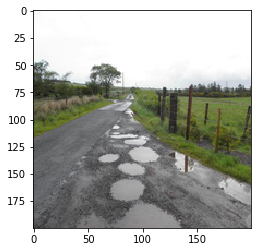

In [0]:
plt.imshow(xx[30]);

In [0]:
model = make_model()
model.fit_generator(
    pothole_batch_loader(),
    steps_per_epoch=5,
    epochs=2,
)

58892288/58889256 [==============================] - 2s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 5 steps
Epoch 1/2
5/5 [==============================] - 19s 4s/step - loss: 0.9789
Epoch 2/2
5/5 [==============================] - 16s 3s/step - loss: 0.6781


In [0]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [0]:
# Make predictions
def pothole_prediction_bg(img):
  dims = 200
  im = Image.open(img)
  x = np.array(im.resize((200,200), Image.ANTIALIAS))

  # Predict
  X = np.expand_dims(x, 0) / 255.
  p = model.predict(X)[0] 
  # Plot
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8)) 
  print(p)
  # Draw the box
  if p[4] > 0.3:
    row0 = int(p[0]*dims)
    col0 = int(p[1]*dims)
    row1 = int(row0 + p[2]*dims)
    col1 = int(col0 + p[3]*dims)
    print("pred:", row0, col0, row1, col1)
    rect = Rectangle(
        (p[1]*dims, p[0]*dims),
        p[3]*dims, p[2]*dims,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
  else:
    print("pred: no pothole")
  plt.show()

[0.41188678 0.5286593  0.37428293 0.24068774 0.9993079 ]
pred: 82 105 156 153


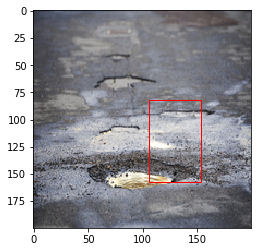

CPU times: user 537 ms, sys: 168 ms, total: 705 ms
Wall time: 741 ms


In [0]:
%%time
pothole_prediction_bg('/content/pothole_image_data/Pothole_Image_Data/'+'11.jpg')

[0.8624422  0.4248455  0.34114262 0.19236836 0.99907374]
pred: 172 84 240 122


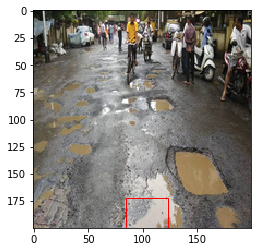

--- 0.2026224136352539 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/pothole_image_data/Pothole_Image_Data/'+'480.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

[0.32871065 0.29871783 0.43898067 0.16509111 0.9929247 ]
pred: 65 59 152 92


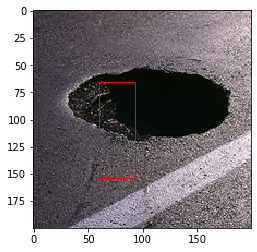

--- 0.20830154418945312 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/35.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

[0.46535575 0.5719824  0.28661045 0.24114004 0.99953854]
pred: 93 114 150 162


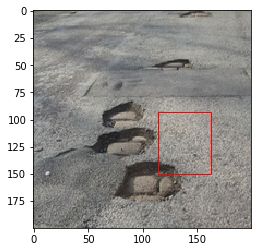

--- 0.21573400497436523 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/8.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/4.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

[0.56768155 0.66607124 0.26216802 0.18030971 0.9704697 ]
pred: 113 133 165 169


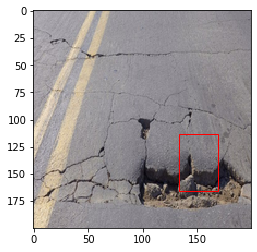

--- 0.19678211212158203 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/61.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

[3.9085054e-01 4.9588108e-01 2.2560494e-01 2.2693405e-01 5.0830124e-05]
pred: no pothole


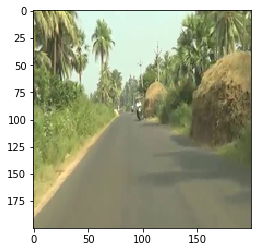

--- 0.20713543891906738 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/roads.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

[0.38370684 0.5937154  0.31846386 0.12768517 0.99738866]
pred: 76 118 139 143


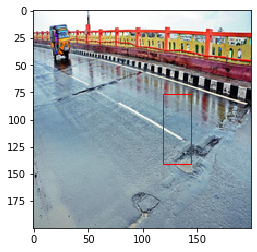

--- 0.20219016075134277 seconds ---


In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/potholegodavari.jpeg')
print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
import time
start_time = time.time()
pothole_prediction_bg('/content/8565_godavari-1.jpg')
print("--- %s seconds ---" % (time.time() - start_time))